In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
print("Columns in dataset:", df.columns)

Columns in dataset: Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [23]:
df.fillna(df.median(numeric_only=True), inplace=True)  

X = df.drop("Survived", axis=1) 
y = df["Survived"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}


In [29]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_tree = DecisionTreeClassifier(**best_params, random_state=42)
best_tree.fit(X_train, y_train)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [31]:
y_pred_tuned = best_tree.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

In [33]:
untuned_tree = DecisionTreeClassifier(random_state=42)
untuned_tree.fit(X_train, y_train)
y_pred_untuned = untuned_tree.predict(X_test)
accuracy_untuned = accuracy_score(y_test, y_pred_untuned)

print(f"Untuned Accuracy: {accuracy_untuned:.4f}")
print(f"Tuned Accuracy: {accuracy_tuned:.4f}")


Untuned Accuracy: 0.7933
Tuned Accuracy: 0.7989


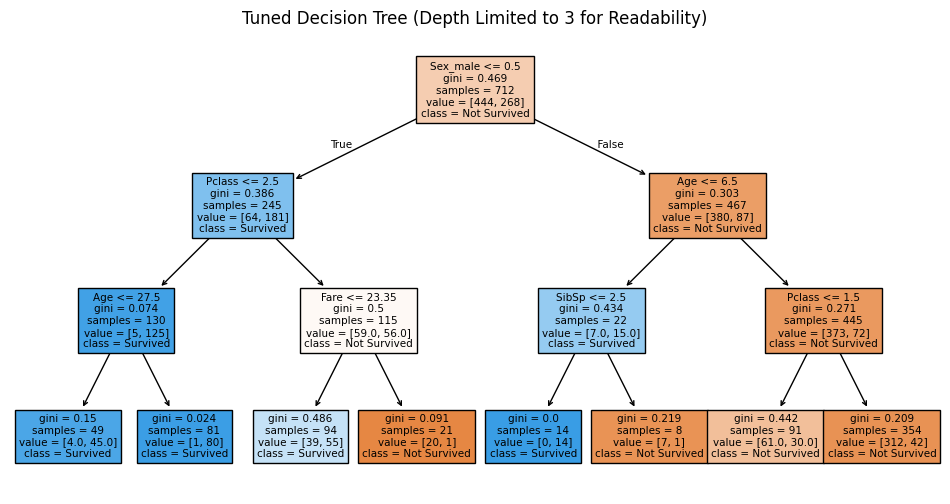

In [35]:
plt.figure(figsize=(12, 6))
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=["Not Survived", "Survived"], max_depth=3)
plt.title("Tuned Decision Tree (Depth Limited to 3 for Readability)")
plt.show()